In [2]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 파일 불러오기를 위한 Path 설정 (데이터를 불러오는 경로를 개인별로 설정)
path = '../dataset/'

# 1. Simple data 형성

In [4]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 지역 A의 범죄 건수라고 가정
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


## 1-1. 데이터 시각화

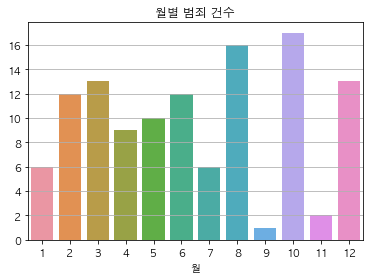

In [5]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('월별 범죄 건수')
plt.xlabel('월')
plt.grid(axis='y')
plt.show()

## 1-2. 평균 도출

### A. 산술평균

In [6]:
# 데이터의 평균값을 도출해보기 (전체 합 / 전체 데이터 개수)

print(X.sum()/len(X))

print(X.mean())

# 만약, 소수점을 출력하지 않는 경우 (round 반올림 함수 이용)

print(round(X.mean()))

9.75
9.75
10


### B. 기하평균

In [53]:
# 변화율 도출하기 (월별 범죄 건수가 얼마의 비율로 변화되었는지)
rate = []
for i in range(len(X)-1):
    rate.append((( (X[i+1]) / X[i] )))

for i in range(11):
    print(f'{i+1}월 대비 {i+2}월의 범죄건수 비율은 약 {rate[i]*100 : .2f}% 입니다.')

1월 대비 2월의 범죄건수 비율은 약  200.00% 입니다.
2월 대비 3월의 범죄건수 비율은 약  108.33% 입니다.
3월 대비 4월의 범죄건수 비율은 약  69.23% 입니다.
4월 대비 5월의 범죄건수 비율은 약  111.11% 입니다.
5월 대비 6월의 범죄건수 비율은 약  120.00% 입니다.
6월 대비 7월의 범죄건수 비율은 약  50.00% 입니다.
7월 대비 8월의 범죄건수 비율은 약  266.67% 입니다.
8월 대비 9월의 범죄건수 비율은 약  6.25% 입니다.
9월 대비 10월의 범죄건수 비율은 약  1700.00% 입니다.
10월 대비 11월의 범죄건수 비율은 약  11.76% 입니다.
11월 대비 12월의 범죄건수 비율은 약  650.00% 입니다.


In [52]:
# 변수 설정 (simple data X는 동일)
# 곱셈에 대한 항등원 1
mulScores = 1 

# 항목들로 반복 (rate의 모든 항목을 곱셈하기 위한 코드)
for item in rate:
    mulScores *= item
print(f'변화율의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(rate)) 
print(f'해당 데이터의 기하평균(=평균 증가율) 값은 약 {geometricMean1*100}% 입니다.')

변화율의 모든 값을 곱하면 2.166666666666666가 됩니다.
해당 데이터의 기하평균(=평균 증가율) 값은 약 107.28192428296298% 입니다.


### C. 가중평균

In [9]:
# 가중치도 랜덤으로 설정합니다. (각 의미는 범죄의 피해수준으로 가정해봅니다.)
np.random.seed(2022)
weight = np.random.randint(1, 5, 12)

print('가중치 :',weight)
print('범죄 건수 :',X)
print('범죄 건수의 범죄 피해 수준에 대한 가중평균 값 :', sum(X * weight)/sum(weight))

가중치 : [2 1 2 1 2 2 1 4 1 3 1 1]
범죄 건수 : [ 6 12 13  9 10 12  6 16  1 17  2 13]
범죄 건수의 범죄 피해 수준에 대한 가중평균 값 : 11.428571428571429


### D. 절사평균

In [10]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정 (양 극단 5%의 데이터 제외)
cut = 0.05
n = len(X)
tem_data = sorted(X)
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data]}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {np.mean(tem_data[cut_data : -cut_data])}입니다.')

5.0% 비율로 절사한 후 data는 [2, 6, 6, 9, 10, 12, 12, 13, 13, 16]입니다.
5.0% 비율로 절사한 후 data의 평균은 9.9입니다.


## 1-3. 중위값 도출

In [16]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(X)
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

# np.median을 사용
print(np.median(X))

[1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
6
11.0
11.0


# 데이터 실습
- 출처 (URL)
- https://www.data.go.kr/data/15070037/fileData.do

## 설명
- 강원도내에서 발생한 5대범죄 발생 및 검거 현황을 연도별로 제공하는 데이터입니다.(2014-2019)
- 살인/강도/강간/절도/폭력 사건에 대해 발생건수와 검거건수를 제공합니다.

In [19]:
# CSV 파일로 불러오기
data = pd.read_csv(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [20]:
# excel 파일로 불러오기
data = pd.read_excel(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.xlsx')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


## 실습


0    83.7
1    85.0
2    83.6
3    84.2
4    79.2
5    72.8
Name: 검거율, dtype: float64


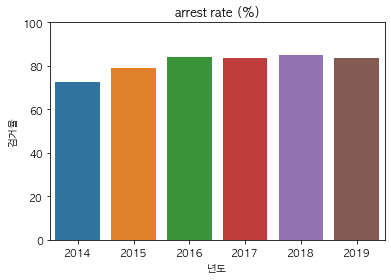

In [22]:
# 데이터 보기
print(data['검거율'])

sns.barplot(x = data['년도'], y = data['검거율'])
plt.ylim(0,100)
plt.title('arrest rate (%)')
plt.show()

### 1. 평균값

#### A 산술평균

In [13]:
# 데이터의 평균값을 도출해보기 (전체 합 / 전체 데이터 개수)

print(data['검거율'].sum()/len(data['검거율']))

print(data['검거율'].mean())

# 만약, 소수점 2째 자리까지만 출력하는 경우 (round 반올림 함수 이용)

print(round(data['검거율'].mean(), 2))

81.41666666666667
81.41666666666667
81.42


In [11]:
# 평균값 도출을 위한 함수입니다.
def mean(data, column_name):
    print(f'해당 데이터의 컬럼 중 {column_name}의 평균값(mean)은 {data[column_name].mean()} 입니다.')

mean(data, '검거율')

해당 데이터의 컬럼 중 검거율의 평균값(mean)은 81.41666666666667 입니다.


#### B. 기하평균

In [54]:
# 증감률 도출하기 (월별 범죄 건수가 어떤 비율로 증감되었는지)
rate = []
for i in range(len(data['검거율'])-1):
    rate.append((( (data['검거율'][i+1] ) / data['검거율'][i] )))


for i in range(len(data['검거율'])-1):
    print(f'{i+2014}년 대비 {i+2015}년의 범죄건수 증가율은 약 {rate[i]*100 : .2f}% 입니다.')

2014년 대비 2015년의 범죄건수 증가율은 약  101.55% 입니다.
2015년 대비 2016년의 범죄건수 증가율은 약  98.35% 입니다.
2016년 대비 2017년의 범죄건수 증가율은 약  100.72% 입니다.
2017년 대비 2018년의 범죄건수 증가율은 약  94.06% 입니다.
2018년 대비 2019년의 범죄건수 증가율은 약  91.92% 입니다.


In [56]:
# 변수 설정
mulScores = 1 # 곱셈에 대한 항등원 1

# 항목들로 반복 (tem_data의 모든 항목을 곱셈하기 위한 코드)
for item in rate:
    mulScores *= item
print(f'{rate} 내의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(rate)) 
print(f'해당 데이터의 기하평균 값은 {geometricMean1} 입니다.')

[1.015531660692951, 0.9835294117647058, 1.0071770334928232, 0.9406175771971497, 0.9191919191919191] 내의 모든 값을 곱하면 0.8697729988052568가 됩니다.
해당 데이터의 기하평균 값은 0.9724811327406481 입니다.


#### C. 가중평균

0    13859
1    14094
2    16187
3    16678
4    16441
5    16487
Name: 발생, dtype: int64


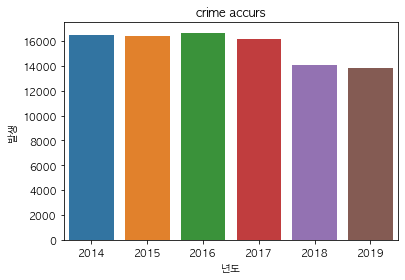

In [23]:
# 데이터 보기

print(data['발생'])

sns.barplot(x = data['년도'], y = data['발생'])
plt.title('crime accurs')
plt.show()

In [101]:
# 가중치는 범죄 발생으로 설정하고 검거율의 가중평균을 시행해봅니다.

print('가중치 :',data['발생'].tolist())
print('검거율 :',data['검거율'].tolist())

weight = data['발생']
tem_data = data['검거율']

print('검거율의 범죄 발생에 대한 가중평균 값 :', sum(tem_data * weight)/sum(weight))

가중치 : [13859, 14094, 16187, 16678, 16441, 16487]
검거율 : [83.7, 85.0, 83.6, 84.2, 79.2, 72.8]
검거율의 범죄 발생에 대한 가중평균 값 : 81.26095940093444


#### 4. 절사평균

In [105]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정
cut = 0.15
n = len(data)
tem_data = data['검거율']
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data].tolist()}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {tem_data[cut_data : -cut_data].mean()}입니다.')

15.0% 비율로 절사한 후 data는 [85.0, 83.6, 84.2, 79.2]입니다.
15.0% 비율로 절사한 후 data의 평균은 83.0입니다.


### 중위값 도출

In [106]:
# 데이터 보기

print(data['검거율'])

0    83.7
1    85.0
2    83.6
3    84.2
4    79.2
5    72.8
Name: 검거율, dtype: float64


In [53]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(data['검거율'])
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

[72.8, 79.2, 83.6, 83.7, 84.2, 85.0]
3
83.65


In [107]:
# 중위값(median) 도출을 위한 함수입니다. (파이썬 함수를 활용한 중위값 출력 부분)
def mean(data = data, column_name = '발생'):
    print(f'해당 데이터의 컬럼 중 {column_name}의 중위값(median)은 {data[column_name].median()} 입니다.')
    
mean(data, '검거율')

해당 데이터의 컬럼 중 검거율의 중위값(median)은 83.65 입니다.
